In [1]:
# LeedsNet3.py : It is a deep learning network created by @leopauly (cnlp@leeds.ac.uk)
# Networkd designed to study the effect of how the variation of different factors effect the accuracy of the network
# using My civil dataset

import numpy
import glob
import sys
import datetime
from PIL import Image  
from scipy import misc
from scipy import ndimage
from matplotlib import pyplot 
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

from keras.datasets import mnist,cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import History,CSVLogger,ReduceLROnPlateau
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
#Load data base and give image propereties like hight, width etc.
imagefolderpath= ('./civildataset/') 
X=numpy.array([numpy.array(Image.open(str(imagefolderpath+str(i)+'.jpg')).convert('RGB'),'f') for i in range(1,211)])
print (X.shape)  
img_rows=100;
img_cols=100;
channel=3;
nb_classes=6


(210, 100, 100, 3)


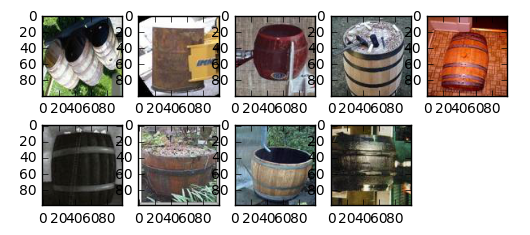

(210, 100, 100, 3)


In [4]:
#to display and check if all images are loaded correctly

lower_range=20;
upper_range=29;

for i in range(lower_range, upper_range):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(misc.toimage(X[i]))
pyplot.show()
print(X.shape)

In [5]:
y_1=numpy.array([(0) for i in range (1,36)]);
y_2=numpy.array([(1) for i in range (36,71)]);
y_3=numpy.array([(2) for i in range (71,106)]);
y_4=numpy.array([(3) for i in range (106,141)]);
y_5=numpy.array([(4) for i in range (141,176)]);
y_6=numpy.array([(5) for i in range (176,211)]);
   
y_7=numpy.append(y_1,y_2)
y_8=numpy.append(y_3,y_4)
y_9=numpy.append(y_5,y_6)

y_10=numpy.append(y_7,y_8)
y=numpy.append(y_10,y_9)

print (y.shape) 
#print (y)


(210,)


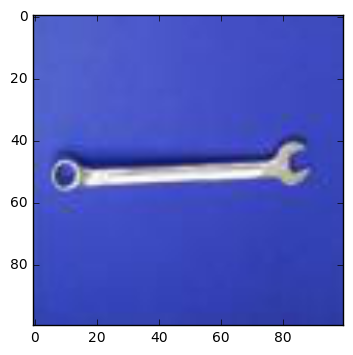

5


In [6]:
#to display and check if images and labels are in order
def checker(check):
   myimage = array_to_img(X[check])
   pyplot.imshow(myimage)
   pyplot.show()
   print(y[check])
    
checker(202)

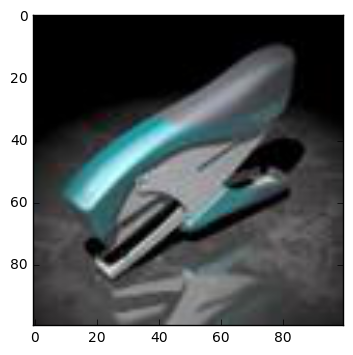

4


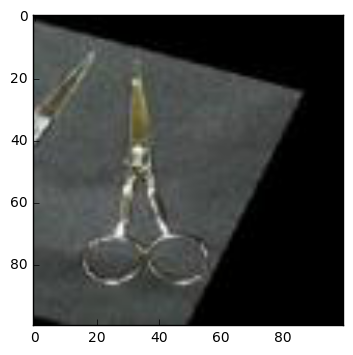

3


In [7]:
X,y = shuffle(X,y, random_state=1)
X,y = shuffle(X,y, random_state=2)

checker(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
#(X_train, y_train),(X_test,y_test)=cifar10.load_data()

myimage = array_to_img(X_train[20])
#myimage=X_train[20]
pyplot.imshow(myimage)
pyplot.show()
print (y_train[20])


(189, 100, 100, 3)
(21, 100, 100, 3)
(189, 100, 100, 3)
(21, 100, 100, 3)


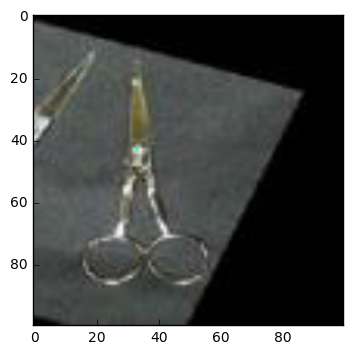

3
(189,)
(21,)
(189, 6)
(21, 6)


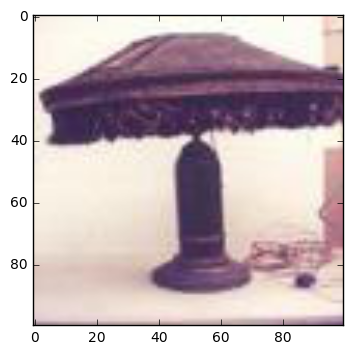

[ 0.  0.  1.  0.  0.  0.]


In [8]:
print (X_train.shape)
print (X_test.shape)

K.set_image_dim_ordering('tf')
X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,channel)
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,channel)
input_shape=(img_rows,img_cols,channel)

print (X_train.shape)
print (X_test.shape)

myimage = array_to_img(X_train[2])
myimage=X_train[20]
pyplot.imshow(myimage)
pyplot.show()
print (y_train[20])


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print (y_train.shape)
print (y_test.shape)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print (y_train.shape)
print (y_test.shape)

myimage = array_to_img(X_train[2])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[2])


In [9]:
#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,zca_whitening=False,
#    rotation_range=0,
#    width_shift_range=0,
#    height_shift_range=0,
#    shear_range=0,
#    zoom_range=0,
#    channel_shift_range=0.,
#    fill_mode='nearest',
#    cval=0.,
#    horizontal_flip=False,
#    vertical_flip=False,
#    rescale=1)

#datagen.fit(X_train)
#datagen.fit(X_test)

In [10]:
LeedsNet = Sequential()
LeedsNet.add(Convolution2D(16, 3, 3, input_shape=input_shape, activation='relu',border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(MaxPooling2D(pool_size=(2, 2)))

LeedsNet.add(Flatten())
LeedsNet.add(Dense(256, activation='relu', W_constraint=maxnorm(3)))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Dense(nb_classes, activation='softmax'))

In [11]:
#LeedsNet = Sequential()
#LeedsNet.add(Convolution2D(64, 3, 3, input_shape=input_shape, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005)))
#LeedsNet.add(MaxPooling2D((2,2), strides=(2,2),border_mode='valid', dim_ordering='tf'))
#LeedsNet.add(Convolution2D(128, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add(MaxPooling2D((2,2), strides=(2,2),border_mode='valid', dim_ordering='tf'))

#LeedsNet.add(Flatten())
##LeedsNet.add(Dense(1152, activation='relu'))
#LeedsNet.add(Dropout(0.5))
#LeedsNet.add(Dense(nb_classes, activation='softmax'))

In [12]:
#LeedsNet= Sequential()
#LeedsNet.add (Convolution2D(64, 3, 3, input_shape=input_shape, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005)))
#LeedsNet.add (Convolution2D(64, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add(MaxPooling2D((2,2), strides=(2,2),border_mode='valid', dim_ordering='th'))#

#LeedsNet.add (Convolution2D(128, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add (Convolution2D(128, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add(MaxPooling2D((2,2), strides=(2,2),border_mode='valid', dim_ordering='th'))#

#LeedsNet.add (Convolution2D(256, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add (Convolution2D(256, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add (Convolution2D(256, 3, 3, activation='relu',border_mode='same', init='glorot_normal',W_regularizer=l2(0.0005), ))
#LeedsNet.add(MaxPooling2D((2,2), strides=(2,2),border_mode='valid', dim_ordering='th'))

#LeedsNet.add(Flatten())
#LeedsNet.add(Dense(2304, activation='relu'))
#LeedsNet.add(Dropout(0.5))
#LeedsNet.add(Dense(2304, activation='relu'))
#LeedsNet.add(Dropout(0.5))
#LeedsNet.add(Dense(nb_classes, activation='softmax'))

In [13]:
epochs = 50
lrate = 0.01
sgd = SGD(lr=lrate, momentum=0.9, nesterov=True)
LeedsNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=10, min_lr=0.0001, epsilon=0.001)
#csv_logger = CSVLogger('trainingLeedsnet3.log',separator=',', append=True)

b_size=32
history=LeedsNet.fit(X_train, y_train, nb_epoch=epochs, 
                     batch_size=b_size, validation_split=0.2, 
                     shuffle='batch')#, callbacks=[csv_logger])

start_time=datetime.datetime.now()
print (start_time)
#LeedsNet.fit_generator(datagen.flow(X_train, y_train, batch_size=b_size),
#                       validation_data=datagen.flow(X_train, y_train),
#                       nb_val_samples=25,samples_per_epoch=len(X_train),nb_epoch=epochs)
#                       ,callbacks=[csv_logger])

end_time=datetime.datetime.now()
print (end_time)

Train on 151 samples, validate on 38 samples
Epoch 1/50
151/151 [==============================] - 2s - loss: 1.8085 - acc: 0.1722 - val_loss: 1.7888 - val_acc: 0.1579
Epoch 2/50
151/151 [==============================] - 2s - loss: 1.8774 - acc: 0.1722 - val_loss: 1.7892 - val_acc: 0.0789
Epoch 3/50
151/151 [==============================] - 1s - loss: 1.8326 - acc: 0.2252 - val_loss: 1.7895 - val_acc: 0.1053
Epoch 4/50
151/151 [==============================] - 2s - loss: 1.8268 - acc: 0.1987 - val_loss: 1.7827 - val_acc: 0.1316
Epoch 5/50
151/151 [==============================] - 2s - loss: 1.7904 - acc: 0.2980 - val_loss: 1.7779 - val_acc: 0.2368
Epoch 6/50
151/151 [==============================] - 2s - loss: 1.7721 - acc: 0.2715 - val_loss: 1.7645 - val_acc: 0.3421
Epoch 7/50
151/151 [==============================] - 2s - loss: 1.7533 - acc: 0.2914 - val_loss: 1.7575 - val_acc: 0.2368
Epoch 8/50
151/151 [==============================] - 2s - loss: 1.7141 - acc: 0.3510 - val_lo

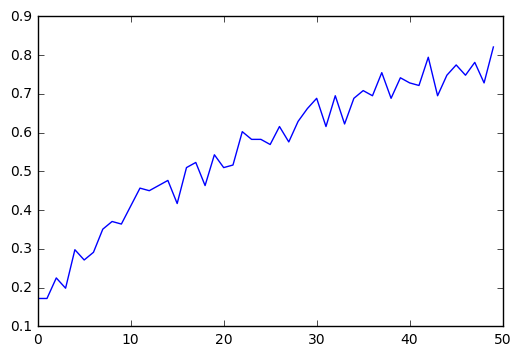

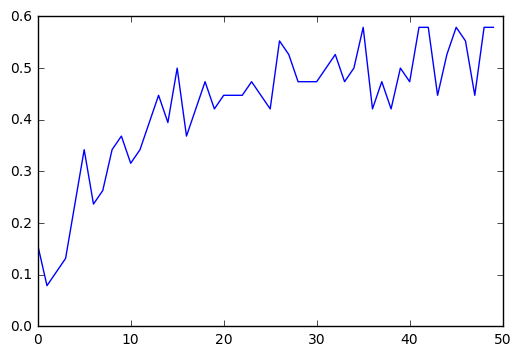

In [15]:
pyplot.plot(history.history['acc'])
pyplot.show()

pyplot.plot(history.history['val_acc'])
pyplot.show()

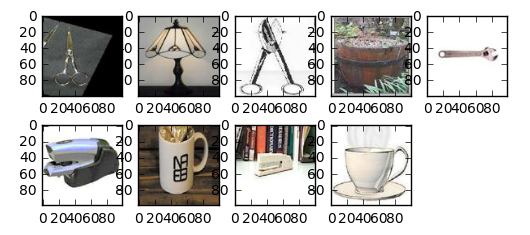

(210, 100, 100, 3)


In [16]:
lower_range=20;
upper_range=29;

for i in range(lower_range, upper_range):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(misc.toimage(X_train[i]))
pyplot.show()
print(X.shape)

In [17]:
y_train[20:29]

array([[ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

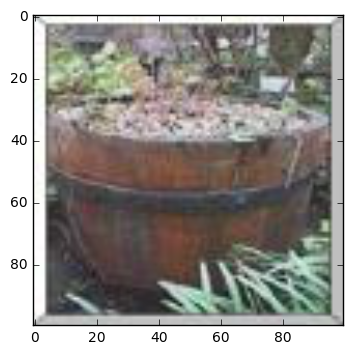

[ 1.  0.  0.  0.  0.  0.]


In [18]:
myimage = array_to_img(X_train[23])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[23])

In [19]:
#Preparing documentation
import sys
sys.stdout = open('LeedsNet3log.txt', 'a')

print("\n",'LeedsNet < New Attempts Next> : Results when LeedsNet3 was trained on My civil dataset dataset',"\n")
print("\n",'Network architechture',"\n")
print(LeedsNet.summary())
print("\n",'Results: Colomn headings',"\n",history.history.keys())
print("\n",'Results: Training',"\n",history.history,"\n")
print("\n",'Time taken for training',"\n",' Start Time:', start_time,"\n",'End Time:', end_time,"\n")
#print("\n","Accuracy on testing data: %.2f%%" % (scores[1]*100),"\n")

#sys.stdout.close()